In [1]:

import requests
import json
import pandas as pd

# Kyle Lowry's player ID
url = "https://www.balldontlie.io/api/v1/players"
params = {"search":"Kyle Lowry"}
response = requests.get(url, params=params)
response.json()


{'data': [{'id': 286,
   'first_name': 'Kyle',
   'height_feet': 6,
   'height_inches': 1,
   'last_name': 'Lowry',
   'position': 'G',
   'team': {'id': 16,
    'abbreviation': 'MIA',
    'city': 'Miami',
    'conference': 'East',
    'division': 'Southeast',
    'full_name': 'Miami Heat',
    'name': 'Heat'},
   'weight_pounds': 196}],
 'meta': {'total_pages': 1,
  'current_page': 1,
  'next_page': None,
  'per_page': 25,
  'total_count': 1}}

In [2]:
# DeMar DeRozen player ID
url = "https://www.balldontlie.io/api/v1/players"
params = {"search":"DeMar DeRozan"}
response = requests.get(url, params=params)
response.json()


{'data': [{'id': 125,
   'first_name': 'DeMar',
   'height_feet': 6,
   'height_inches': 7,
   'last_name': 'DeRozan',
   'position': 'G',
   'team': {'id': 5,
    'abbreviation': 'CHI',
    'city': 'Chicago',
    'conference': 'East',
    'division': 'Central',
    'full_name': 'Chicago Bulls',
    'name': 'Bulls'},
   'weight_pounds': 220}],
 'meta': {'total_pages': 1,
  'current_page': 1,
  'next_page': None,
  'per_page': 25,
  'total_count': 1}}

In [3]:
# Kyle Lowry ID: 286
# DeMar DeRozen ID: 237

# Get all stats GET https://www.balldontlie.io/api/v1/stats from 2015-2017 for Kyle Lowry and store it in a new list
url = "https://www.balldontlie.io/api/v1/stats"
params = {"player_ids[]":286, "seasons[]":2015, "seasons[]":2016, "seasons[]":2017}
response = requests.get(url, params=params)
response.json()





{'data': [{'id': 808937,
   'ast': 9,
   'blk': 0,
   'dreb': 4,
   'fg3_pct': 0.333,
   'fg3a': 3,
   'fg3m': 1,
   'fg_pct': 0.571,
   'fga': 7,
   'fgm': 4,
   'ft_pct': 1.0,
   'fta': 3,
   'ftm': 3,
   'game': {'id': 35269,
    'date': '2017-10-19T00:00:00.000Z',
    'home_team_id': 28,
    'home_team_score': 117,
    'period': 4,
    'postseason': False,
    'season': 2017,
    'status': 'Final',
    'time': ' ',
    'visitor_team_id': 5,
    'visitor_team_score': 100},
   'min': '31:20',
   'oreb': 0,
   'pf': 1,
   'player': {'id': 286,
    'first_name': 'Kyle',
    'height_feet': 6,
    'height_inches': 1,
    'last_name': 'Lowry',
    'position': 'G',
    'team_id': 16,
    'weight_pounds': 196},
   'pts': 12,
   'reb': 4,
   'stl': 1,
   'team': {'id': 28,
    'abbreviation': 'TOR',
    'city': 'Toronto',
    'conference': 'East',
    'division': 'Atlantic',
    'full_name': 'Toronto Raptors',
    'name': 'Raptors'},
   'turnover': 4},
  {'id': 809502,
   'ast': 5,
   'blk':

In [4]:
# Get all stats GET https://www.balldontlie.io/api/v1/stats from 2015-2017 for DeMar DeRozan and store it in a new list
url = "https://www.balldontlie.io/api/v1/stats"
params = {"player_ids[]":237, "seasons[]":2015, "seasons[]":2016, "seasons[]":2017}
response = requests.get(url, params=params)
response.json()


{'data': [{'id': 808598,
   'ast': 9,
   'blk': 2,
   'dreb': 15,
   'fg3_pct': 0.2,
   'fg3a': 5,
   'fg3m': 1,
   'fg_pct': 0.632,
   'fga': 19,
   'fgm': 12,
   'ft_pct': 1.0,
   'fta': 4,
   'ftm': 4,
   'game': {'id': 34615,
    'date': '2017-10-17T00:00:00.000Z',
    'home_team_id': 6,
    'home_team_score': 102,
    'period': 4,
    'postseason': False,
    'season': 2017,
    'status': 'Final',
    'time': ' ',
    'visitor_team_id': 2,
    'visitor_team_score': 99},
   'min': '41:12',
   'oreb': 1,
   'pf': 3,
   'player': {'id': 237,
    'first_name': 'LeBron',
    'height_feet': 6,
    'height_inches': 8,
    'last_name': 'James',
    'position': 'F',
    'team_id': 14,
    'weight_pounds': 250},
   'pts': 29,
   'reb': 16,
   'stl': 0,
   'team': {'id': 6,
    'abbreviation': 'CLE',
    'city': 'Cleveland',
    'conference': 'East',
    'division': 'Central',
    'full_name': 'Cleveland Cavaliers',
    'name': 'Cavaliers'},
   'turnover': 4},
  {'id': 809203,
   'ast': 8,
 

In [5]:
url = "https://www.balldontlie.io/api/v1/stats"
params = {
    "player_ids[]": 286,  
    "seasons[]": [2015, 2016, 2017]  
}


all_stats = []

# While loop to handle pagination
while True:
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        all_stats.extend(data['data'])  

        # Check if there's a next page
        if data["meta"]["next_page"]:
            params["page"] = data["meta"]["next_page"]
        else:
            break
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        break

# Convert the list to a DataFrame
kyle_lowry_df = pd.DataFrame(all_stats)


kyle_lowry_df

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game,min,oreb,pf,player,pts,reb,stl,team,turnover
0,766903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'id': 29320, 'date': '2016-03-23T00:00:00.000...",None,NaN,NaN,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",NaN,NaN,NaN,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",NaN
1,741348,6.0,0.0,2.0,0.50,4.0,2.0,0.471,17.0,8.0,...,"{'id': 27820, 'date': '2015-10-28T00:00:00.000...",38:58,1.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",23.0,3.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",5.0
2,741621,9.0,2.0,6.0,0.00,1.0,0.0,0.273,11.0,3.0,...,"{'id': 27689, 'date': '2015-10-30T00:00:00.000...",34:14,1.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",14.0,7.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
3,742201,7.0,0.0,3.0,0.20,5.0,1.0,0.500,10.0,5.0,...,"{'id': 28885, 'date': '2015-11-01T00:00:00.000...",29:19,2.0,3.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",15.0,5.0,4.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
4,742593,10.0,2.0,5.0,0.80,5.0,4.0,0.600,15.0,9.0,...,"{'id': 29251, 'date': '2015-11-03T00:00:00.000...",36:49,0.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",27.0,5.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,840561,10.0,0.0,2.0,0.50,6.0,3.0,0.538,13.0,7.0,...,"{'id': 33292, 'date': '2018-04-25T00:00:00.000...",37:37,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",17.0,2.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
255,840689,10.0,0.0,3.0,0.50,6.0,3.0,0.500,12.0,6.0,...,"{'id': 35639, 'date': '2018-05-01T00:00:00.000...",39:40,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",18.0,3.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
256,840947,8.0,0.0,4.0,0.50,6.0,3.0,0.700,10.0,7.0,...,"{'id': 33043, 'date': '2018-05-03T00:00:00.000...",33:47,0.0,5.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",21.0,4.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
257,840986,7.0,0.0,3.0,0.50,8.0,4.0,0.692,13.0,9.0,...,"{'id': 33047, 'date': '2018-05-05T00:00:00.000...",41:11,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",27.0,3.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",5.0


In [6]:
url = "https://www.balldontlie.io/api/v1/stats"
params = {
    "player_ids[]": 125,  
    "seasons[]": [2015, 2016, 2017]  
}


all_stats = []

# While loop to handle pagination
while True:
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        all_stats.extend(data['data'])  

       
        if data["meta"]["next_page"]:
            params["page"] = data["meta"]["next_page"]
        else:
            break
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        break


demar_derozan_df = pd.DataFrame(all_stats)


demar_derozan_df

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game,min,oreb,pf,player,pts,reb,stl,team,turnover
0,835385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'id': 34511, 'date': '2018-03-20T00:00:00.000...",None,NaN,NaN,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",NaN,NaN,NaN,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",NaN
1,741347,6.0,0.0,5.0,0.50,2.0,1.0,0.412,17.0,7.0,...,"{'id': 27820, 'date': '2015-10-28T00:00:00.000...",35:52,0.0,2.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",25.0,5.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
2,741620,6.0,0.0,6.0,0.25,4.0,1.0,0.333,15.0,5.0,...,"{'id': 27689, 'date': '2015-10-30T00:00:00.000...",34:45,1.0,4.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",23.0,7.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
3,742200,4.0,1.0,1.0,0.00,1.0,0.0,0.538,13.0,7.0,...,"{'id': 28885, 'date': '2015-11-01T00:00:00.000...",37:17,0.0,1.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",15.0,1.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
4,742592,2.0,0.0,3.0,0.00,0.0,0.0,0.462,13.0,6.0,...,"{'id': 29251, 'date': '2015-11-03T00:00:00.000...",28:23,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",20.0,4.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,840560,5.0,0.0,2.0,0.75,4.0,3.0,0.500,24.0,12.0,...,"{'id': 33292, 'date': '2018-04-25T00:00:00.000...",39:09,0.0,2.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",32.0,2.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
273,840688,5.0,3.0,6.0,0.00,4.0,0.0,0.500,20.0,10.0,...,"{'id': 35639, 'date': '2018-05-01T00:00:00.000...",40:17,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",22.0,7.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
274,840946,3.0,0.0,0.0,0.00,5.0,0.0,0.478,23.0,11.0,...,"{'id': 33043, 'date': '2018-05-03T00:00:00.000...",35:06,0.0,5.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",24.0,0.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
275,840982,2.0,2.0,3.0,0.00,0.0,0.0,0.250,12.0,3.0,...,"{'id': 33047, 'date': '2018-05-05T00:00:00.000...",27:48,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",8.0,4.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0


In [7]:
kyle_lowry_df.columns

Index(['id', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct', 'fga',
       'fgm', 'ft_pct', 'fta', 'ftm', 'game', 'min', 'oreb', 'pf', 'player',
       'pts', 'reb', 'stl', 'team', 'turnover'],
      dtype='object')

In [8]:
# Extracting 'id' and 'date' from the 'game' column and create new columns
kyle_lowry_df['id'] = kyle_lowry_df['game'].apply(lambda g: g['id'] if pd.notnull(g) else None)
kyle_lowry_df['date'] = kyle_lowry_df['game'].apply(lambda g: g['date'] if pd.notnull(g) else None)

# Drop the original 'game' column 
kyle_lowry_df = kyle_lowry_df.drop('game', axis=1)

# Define the order of your columns starting with 'id' and 'date'
column_order = ['id', 'date'] + [col for col in kyle_lowry_df if col not in ['id', 'date']]

kyle_lowry_df = kyle_lowry_df[column_order]

kyle_lowry_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ftm,min,oreb,pf,player,pts,reb,stl,team,turnover
0,29320,2016-03-23T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,NaN,NaN,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",NaN,NaN,NaN,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",NaN
1,27820,2015-10-28T00:00:00.000Z,6.0,0.0,2.0,0.50,4.0,2.0,0.471,17.0,...,5.0,38:58,1.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",23.0,3.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",5.0
2,27689,2015-10-30T00:00:00.000Z,9.0,2.0,6.0,0.00,1.0,0.0,0.273,11.0,...,8.0,34:14,1.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",14.0,7.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
3,28885,2015-11-01T00:00:00.000Z,7.0,0.0,3.0,0.20,5.0,1.0,0.500,10.0,...,4.0,29:19,2.0,3.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",15.0,5.0,4.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
4,29251,2015-11-03T00:00:00.000Z,10.0,2.0,5.0,0.80,5.0,4.0,0.600,15.0,...,5.0,36:49,0.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",27.0,5.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,33292,2018-04-25T00:00:00.000Z,10.0,0.0,2.0,0.50,6.0,3.0,0.538,13.0,...,0.0,37:37,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",17.0,2.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
255,35639,2018-05-01T00:00:00.000Z,10.0,0.0,3.0,0.50,6.0,3.0,0.500,12.0,...,3.0,39:40,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",18.0,3.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
256,33043,2018-05-03T00:00:00.000Z,8.0,0.0,4.0,0.50,6.0,3.0,0.700,10.0,...,4.0,33:47,0.0,5.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",21.0,4.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
257,33047,2018-05-05T00:00:00.000Z,7.0,0.0,3.0,0.50,8.0,4.0,0.692,13.0,...,5.0,41:11,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",27.0,3.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",5.0


In [9]:
# Extracting 'id' and 'date' from the 'game' column and create new columns
demar_derozan_df['id'] = demar_derozan_df['game'].apply(lambda g: g['id'] if pd.notnull(g) else None)
demar_derozan_df['date'] = demar_derozan_df['game'].apply(lambda g: g['date'] if pd.notnull(g) else None)

# Drop the original 'game' column 
demar_derozan_df = demar_derozan_df.drop('game', axis=1)

# Define the order of your columns starting with 'id' and 'date'
column_order = ['id', 'date'] + [col for col in demar_derozan_df if col not in ['id', 'date']]

demar_derozan_df = demar_derozan_df[column_order]

demar_derozan_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ftm,min,oreb,pf,player,pts,reb,stl,team,turnover
0,34511,2018-03-20T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,NaN,NaN,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",NaN,NaN,NaN,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",NaN
1,27820,2015-10-28T00:00:00.000Z,6.0,0.0,5.0,0.50,2.0,1.0,0.412,17.0,...,10.0,35:52,0.0,2.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",25.0,5.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
2,27689,2015-10-30T00:00:00.000Z,6.0,0.0,6.0,0.25,4.0,1.0,0.333,15.0,...,12.0,34:45,1.0,4.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",23.0,7.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
3,28885,2015-11-01T00:00:00.000Z,4.0,1.0,1.0,0.00,1.0,0.0,0.538,13.0,...,1.0,37:17,0.0,1.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",15.0,1.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
4,29251,2015-11-03T00:00:00.000Z,2.0,0.0,3.0,0.00,0.0,0.0,0.462,13.0,...,8.0,28:23,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",20.0,4.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,33292,2018-04-25T00:00:00.000Z,5.0,0.0,2.0,0.75,4.0,3.0,0.500,24.0,...,5.0,39:09,0.0,2.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",32.0,2.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
273,35639,2018-05-01T00:00:00.000Z,5.0,3.0,6.0,0.00,4.0,0.0,0.500,20.0,...,2.0,40:17,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",22.0,7.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
274,33043,2018-05-03T00:00:00.000Z,3.0,0.0,0.0,0.00,5.0,0.0,0.478,23.0,...,2.0,35:06,0.0,5.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",24.0,0.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
275,33047,2018-05-05T00:00:00.000Z,2.0,2.0,3.0,0.00,0.0,0.0,0.250,12.0,...,2.0,27:48,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",8.0,4.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0


In [10]:
kyle_lowry_df.describe()

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,oreb,pf,pts,reb,stl,turnover
count,259.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,32826.393822,6.715415,0.312253,4.169960,0.384632,7.312253,2.869565,0.435696,14.233202,6.225296,0.738119,5.083004,4.154150,0.758893,2.786561,19.474308,4.928854,1.541502,2.735178
std,2338.461843,2.628831,0.611828,2.251712,0.197208,2.304526,1.705146,0.135344,4.002599,2.642869,0.310845,3.497877,2.955348,0.922153,1.377936,7.594140,2.400991,1.216315,1.651427
min,27306.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,31376.500000,5.000000,0.000000,3.000000,0.250000,6.000000,2.000000,0.333000,11.000000,4.000000,0.667000,2.000000,2.000000,0.000000,2.000000,14.000000,3.000000,1.000000,2.000000
50%,33702.000000,7.000000,0.000000,4.000000,0.400000,7.000000,3.000000,0.444000,14.000000,6.000000,0.800000,5.000000,4.000000,1.000000,3.000000,18.000000,5.000000,1.000000,3.000000
75%,34486.500000,9.000000,1.000000,5.000000,0.500000,9.000000,4.000000,0.526000,17.000000,8.000000,1.000000,7.000000,6.000000,1.000000,4.000000,24.000000,6.000000,2.000000,4.000000
max,35639.000000,15.000000,4.000000,12.000000,1.000000,17.000000,8.000000,0.778000,29.000000,15.000000,1.000000,16.000000,12.000000,4.000000,6.000000,43.000000,13.000000,5.000000,8.000000


In [11]:
kyle_lowry_df.dtypes

id            int64
date         object
ast         float64
blk         float64
dreb        float64
fg3_pct     float64
fg3a        float64
fg3m        float64
fg_pct      float64
fga         float64
fgm         float64
ft_pct      float64
fta         float64
ftm         float64
min          object
oreb        float64
pf          float64
player       object
pts         float64
reb         float64
stl         float64
team         object
turnover    float64
dtype: object

In [12]:
# Change date from object to datetime
kyle_lowry_df['date'] = pd.to_datetime(kyle_lowry_df['date']).dt.date
kyle_lowry_df['date'] = pd.to_datetime(kyle_lowry_df['date']).dt.normalize()

In [13]:
# Change date from object to datetime
demar_derozan_df['date'] = pd.to_datetime(demar_derozan_df['date']).dt.date
demar_derozan_df['date'] = pd.to_datetime(demar_derozan_df['date']).dt.normalize()
demar_derozan_df.dtypes


id                   int64
date        datetime64[ns]
ast                float64
blk                float64
dreb               float64
fg3_pct            float64
fg3a               float64
fg3m               float64
fg_pct             float64
fga                float64
fgm                float64
ft_pct             float64
fta                float64
ftm                float64
min                 object
oreb               float64
pf                 float64
player              object
pts                float64
reb                float64
stl                float64
team                object
turnover           float64
dtype: object

In [14]:
kyle_lowry_df.dtypes

id                   int64
date        datetime64[ns]
ast                float64
blk                float64
dreb               float64
fg3_pct            float64
fg3a               float64
fg3m               float64
fg_pct             float64
fga                float64
fgm                float64
ft_pct             float64
fta                float64
ftm                float64
min                 object
oreb               float64
pf                 float64
player              object
pts                float64
reb                float64
stl                float64
team                object
turnover           float64
dtype: object

In [15]:
# Order by date
kyle_lowry_df = kyle_lowry_df.sort_values(by='date')
kyle_lowry_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ftm,min,oreb,pf,player,pts,reb,stl,team,turnover
1,27820,2015-10-28,6.0,0.0,2.0,0.500,4.0,2.0,0.471,17.0,...,5.0,38:58,1.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",23.0,3.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",5.0
2,27689,2015-10-30,9.0,2.0,6.0,0.000,1.0,0.0,0.273,11.0,...,8.0,34:14,1.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",14.0,7.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
3,28885,2015-11-01,7.0,0.0,3.0,0.200,5.0,1.0,0.500,10.0,...,4.0,29:19,2.0,3.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",15.0,5.0,4.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
4,29251,2015-11-03,10.0,2.0,5.0,0.800,5.0,4.0,0.600,15.0,...,5.0,36:49,0.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",27.0,5.0,3.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
5,31100,2015-11-04,1.0,0.0,4.0,0.375,8.0,3.0,0.357,14.0,...,4.0,33:51,0.0,4.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",17.0,4.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,34808,2018-04-27,6.0,0.0,5.0,0.429,7.0,3.0,0.600,15.0,...,3.0,31:37,1.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",24.0,6.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
255,35639,2018-05-01,10.0,0.0,3.0,0.500,6.0,3.0,0.500,12.0,...,3.0,39:40,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",18.0,3.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
256,33043,2018-05-03,8.0,0.0,4.0,0.500,6.0,3.0,0.700,10.0,...,4.0,33:47,0.0,5.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",21.0,4.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",4.0
257,33047,2018-05-05,7.0,0.0,3.0,0.500,8.0,4.0,0.692,13.0,...,5.0,41:11,0.0,2.0,"{'id': 286, 'first_name': 'Kyle', 'height_feet...",27.0,3.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",5.0


In [16]:
# Order by date
demar_derozan_df = demar_derozan_df.sort_values(by='date')
demar_derozan_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ftm,min,oreb,pf,player,pts,reb,stl,team,turnover
1,27820,2015-10-28,6.0,0.0,5.0,0.50,2.0,1.0,0.412,17.0,...,10.0,35:52,0.0,2.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",25.0,5.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
2,27689,2015-10-30,6.0,0.0,6.0,0.25,4.0,1.0,0.333,15.0,...,12.0,34:45,1.0,4.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",23.0,7.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
3,28885,2015-11-01,4.0,1.0,1.0,0.00,1.0,0.0,0.538,13.0,...,1.0,37:17,0.0,1.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",15.0,1.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
4,29251,2015-11-03,2.0,0.0,3.0,0.00,0.0,0.0,0.462,13.0,...,8.0,28:23,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",20.0,4.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0
5,31100,2015-11-04,3.0,0.0,4.0,0.00,0.0,0.0,0.389,18.0,...,14.0,38:35,1.0,1.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",28.0,5.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,34808,2018-04-27,4.0,0.0,2.0,0.00,4.0,0.0,0.333,18.0,...,4.0,33:27,0.0,2.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",16.0,2.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",0.0
273,35639,2018-05-01,5.0,3.0,6.0,0.00,4.0,0.0,0.500,20.0,...,2.0,40:17,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",22.0,7.0,1.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",2.0
274,33043,2018-05-03,3.0,0.0,0.0,0.00,5.0,0.0,0.478,23.0,...,2.0,35:06,0.0,5.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",24.0,0.0,0.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",1.0
275,33047,2018-05-05,2.0,2.0,3.0,0.00,0.0,0.0,0.250,12.0,...,2.0,27:48,1.0,3.0,"{'id': 125, 'first_name': 'DeMar', 'height_fee...",8.0,4.0,2.0,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",3.0


In [17]:
# Check for Null values
kyle_lowry_df.isnull().sum()


id          0
date        0
ast         6
blk         6
dreb        6
fg3_pct     6
fg3a        6
fg3m        6
fg_pct      6
fga         6
fgm         6
ft_pct      6
fta         6
ftm         6
min         6
oreb        6
pf          6
player      0
pts         6
reb         6
stl         6
team        0
turnover    6
dtype: int64

In [18]:
# Check for Null values
demar_derozan_df.isnull().sum()

id          0
date        0
ast         5
blk         5
dreb        5
fg3_pct     5
fg3a        5
fg3m        5
fg_pct      5
fga         5
fgm         5
ft_pct      5
fta         5
ftm         5
min         5
oreb        5
pf          5
player      0
pts         5
reb         5
stl         5
team        0
turnover    5
dtype: int64

In [19]:
# Drop player and team columns
kyle_lowry_df = kyle_lowry_df.drop(['player', 'team'], axis=1)
kyle_lowry_df.columns

Index(['id', 'date', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct',
       'fga', 'fgm', 'ft_pct', 'fta', 'ftm', 'min', 'oreb', 'pf', 'pts', 'reb',
       'stl', 'turnover'],
      dtype='object')

In [20]:
# Drop player and team columns
demar_derozan_df = demar_derozan_df.drop(['player', 'team'], axis=1)
demar_derozan_df.columns

Index(['id', 'date', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct',
       'fga', 'fgm', 'ft_pct', 'fta', 'ftm', 'min', 'oreb', 'pf', 'pts', 'reb',
       'stl', 'turnover'],
      dtype='object')

In [21]:
# Remove null values
kyle_lowry_df = kyle_lowry_df.dropna()
kyle_lowry_df.shape

(253, 21)

In [22]:
# Remove null values
demar_derozan_df = demar_derozan_df.dropna()
demar_derozan_df.shape

(272, 21)

In [23]:
# Check for duplicates
kyle_lowry_df.duplicated().sum()

0

In [24]:
# Check for duplicates
demar_derozan_df.duplicated().sum()

0

In [25]:
kyle_lowry_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover
1,27820,2015-10-28,6.0,0.0,2.0,0.500,4.0,2.0,0.471,17.0,...,0.833,6.0,5.0,38:58,1.0,4.0,23.0,3.0,2.0,5.0
2,27689,2015-10-30,9.0,2.0,6.0,0.000,1.0,0.0,0.273,11.0,...,0.800,10.0,8.0,34:14,1.0,4.0,14.0,7.0,3.0,3.0
3,28885,2015-11-01,7.0,0.0,3.0,0.200,5.0,1.0,0.500,10.0,...,1.000,4.0,4.0,29:19,2.0,3.0,15.0,5.0,4.0,1.0
4,29251,2015-11-03,10.0,2.0,5.0,0.800,5.0,4.0,0.600,15.0,...,1.000,5.0,5.0,36:49,0.0,4.0,27.0,5.0,3.0,4.0
5,31100,2015-11-04,1.0,0.0,4.0,0.375,8.0,3.0,0.357,14.0,...,0.667,6.0,4.0,33:51,0.0,4.0,17.0,4.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,34808,2018-04-27,6.0,0.0,5.0,0.429,7.0,3.0,0.600,15.0,...,0.750,4.0,3.0,31:37,1.0,2.0,24.0,6.0,1.0,2.0
255,35639,2018-05-01,10.0,0.0,3.0,0.500,6.0,3.0,0.500,12.0,...,1.000,3.0,3.0,39:40,0.0,2.0,18.0,3.0,1.0,4.0
256,33043,2018-05-03,8.0,0.0,4.0,0.500,6.0,3.0,0.700,10.0,...,0.800,5.0,4.0,33:47,0.0,5.0,21.0,4.0,0.0,4.0
257,33047,2018-05-05,7.0,0.0,3.0,0.500,8.0,4.0,0.692,13.0,...,0.833,6.0,5.0,41:11,0.0,2.0,27.0,3.0,2.0,5.0


In [26]:
# Look for blank values
kyle_lowry_df[kyle_lowry_df['pts'] == '']

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover


In [27]:
# Look for blank values
demar_derozan_df[demar_derozan_df['pts'] == '']

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover


<Axes: >

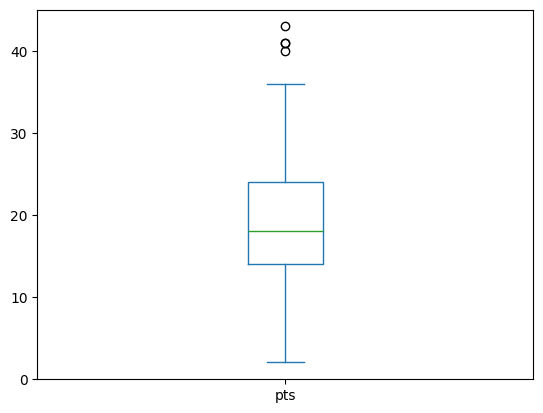

In [28]:
# Look for outliers
kyle_lowry_df['pts'].plot(kind='box')

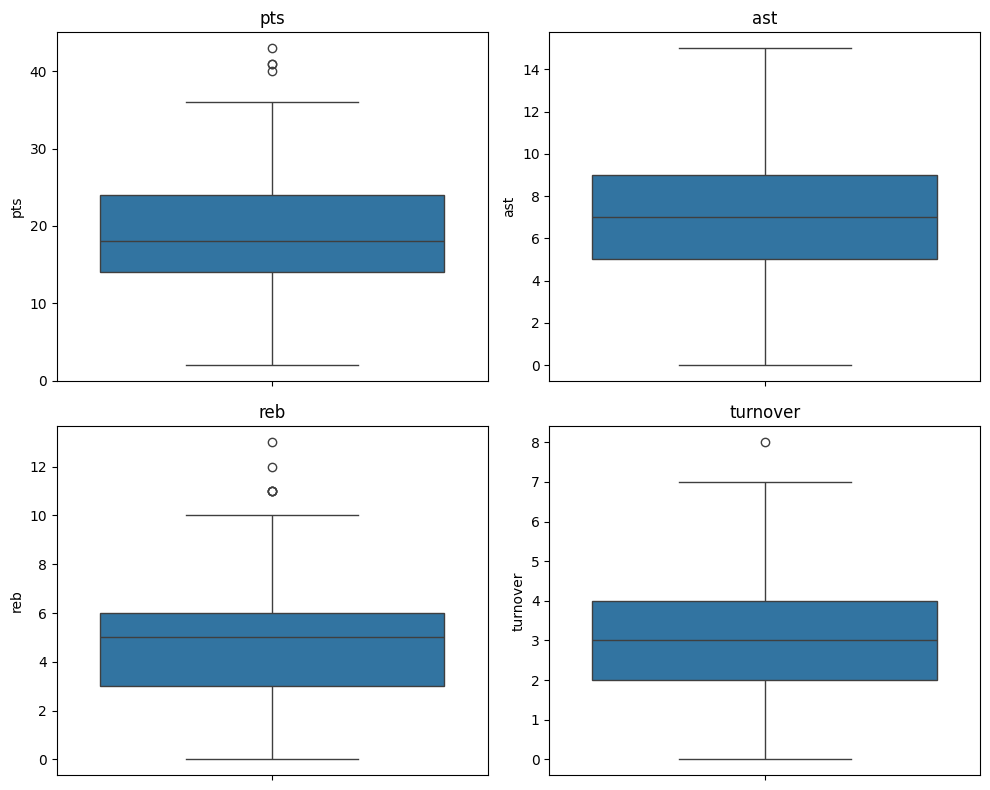

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['pts', 'ast', 'reb', 'turnover']

plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=kyle_lowry_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

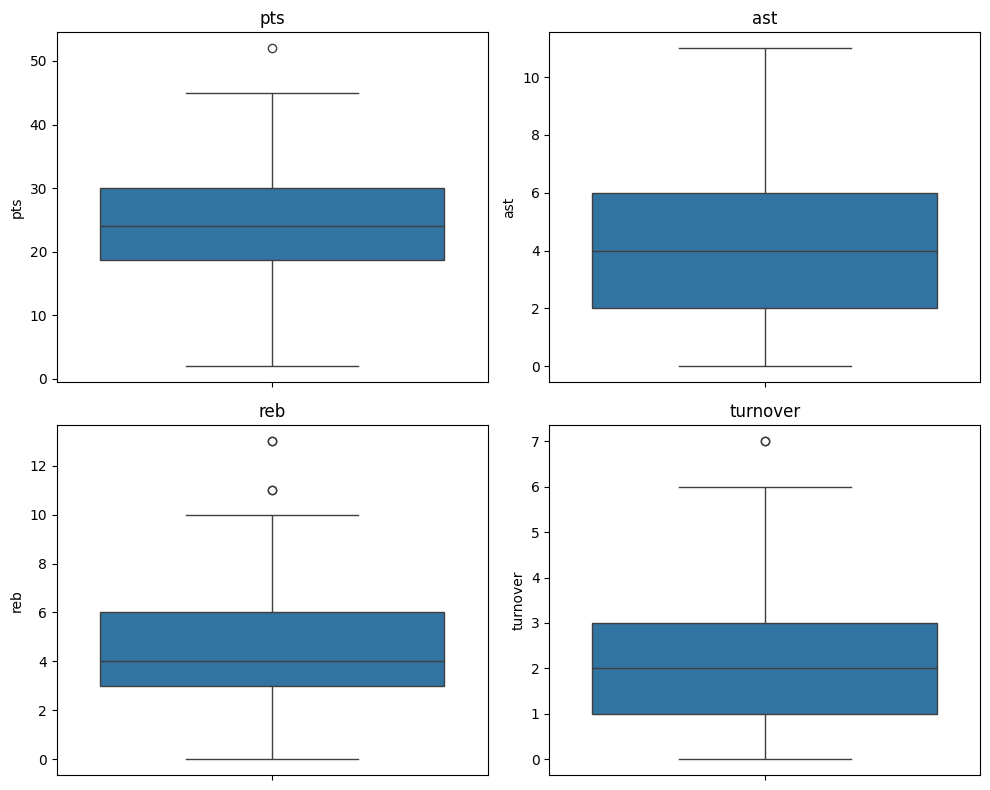

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['pts', 'ast', 'reb', 'turnover']

plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=demar_derozan_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [31]:
# Convert 'min' from "MM:SS" to total minutes as a float
kyle_lowry_df['total_min'] = kyle_lowry_df['min'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60 if isinstance(x, str) else None)
kyle_lowry_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,fta,ftm,min,oreb,pf,pts,reb,stl,turnover,total_min
1,27820,2015-10-28,6.0,0.0,2.0,0.500,4.0,2.0,0.471,17.0,...,6.0,5.0,38:58,1.0,4.0,23.0,3.0,2.0,5.0,38.966667
2,27689,2015-10-30,9.0,2.0,6.0,0.000,1.0,0.0,0.273,11.0,...,10.0,8.0,34:14,1.0,4.0,14.0,7.0,3.0,3.0,34.233333
3,28885,2015-11-01,7.0,0.0,3.0,0.200,5.0,1.0,0.500,10.0,...,4.0,4.0,29:19,2.0,3.0,15.0,5.0,4.0,1.0,29.316667
4,29251,2015-11-03,10.0,2.0,5.0,0.800,5.0,4.0,0.600,15.0,...,5.0,5.0,36:49,0.0,4.0,27.0,5.0,3.0,4.0,36.816667
5,31100,2015-11-04,1.0,0.0,4.0,0.375,8.0,3.0,0.357,14.0,...,6.0,4.0,33:51,0.0,4.0,17.0,4.0,2.0,5.0,33.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,34808,2018-04-27,6.0,0.0,5.0,0.429,7.0,3.0,0.600,15.0,...,4.0,3.0,31:37,1.0,2.0,24.0,6.0,1.0,2.0,31.616667
255,35639,2018-05-01,10.0,0.0,3.0,0.500,6.0,3.0,0.500,12.0,...,3.0,3.0,39:40,0.0,2.0,18.0,3.0,1.0,4.0,39.666667
256,33043,2018-05-03,8.0,0.0,4.0,0.500,6.0,3.0,0.700,10.0,...,5.0,4.0,33:47,0.0,5.0,21.0,4.0,0.0,4.0,33.783333
257,33047,2018-05-05,7.0,0.0,3.0,0.500,8.0,4.0,0.692,13.0,...,6.0,5.0,41:11,0.0,2.0,27.0,3.0,2.0,5.0,41.183333


In [32]:
# Convert 'min' from "MM:SS" to total minutes as a float
demar_derozan_df['total_min'] = demar_derozan_df['min'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60 if isinstance(x, str) else None)
demar_derozan_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,fta,ftm,min,oreb,pf,pts,reb,stl,turnover,total_min
1,27820,2015-10-28,6.0,0.0,5.0,0.50,2.0,1.0,0.412,17.0,...,16.0,10.0,35:52,0.0,2.0,25.0,5.0,2.0,2.0,35.866667
2,27689,2015-10-30,6.0,0.0,6.0,0.25,4.0,1.0,0.333,15.0,...,14.0,12.0,34:45,1.0,4.0,23.0,7.0,2.0,3.0,34.750000
3,28885,2015-11-01,4.0,1.0,1.0,0.00,1.0,0.0,0.538,13.0,...,2.0,1.0,37:17,0.0,1.0,15.0,1.0,1.0,2.0,37.283333
4,29251,2015-11-03,2.0,0.0,3.0,0.00,0.0,0.0,0.462,13.0,...,8.0,8.0,28:23,1.0,3.0,20.0,4.0,1.0,3.0,28.383333
5,31100,2015-11-04,3.0,0.0,4.0,0.00,0.0,0.0,0.389,18.0,...,15.0,14.0,38:35,1.0,1.0,28.0,5.0,2.0,2.0,38.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,34808,2018-04-27,4.0,0.0,2.0,0.00,4.0,0.0,0.333,18.0,...,4.0,4.0,33:27,0.0,2.0,16.0,2.0,0.0,0.0,33.450000
273,35639,2018-05-01,5.0,3.0,6.0,0.00,4.0,0.0,0.500,20.0,...,3.0,2.0,40:17,1.0,3.0,22.0,7.0,1.0,2.0,40.283333
274,33043,2018-05-03,3.0,0.0,0.0,0.00,5.0,0.0,0.478,23.0,...,2.0,2.0,35:06,0.0,5.0,24.0,0.0,0.0,1.0,35.100000
275,33047,2018-05-05,2.0,2.0,3.0,0.00,0.0,0.0,0.250,12.0,...,2.0,2.0,27:48,1.0,3.0,8.0,4.0,2.0,3.0,27.800000


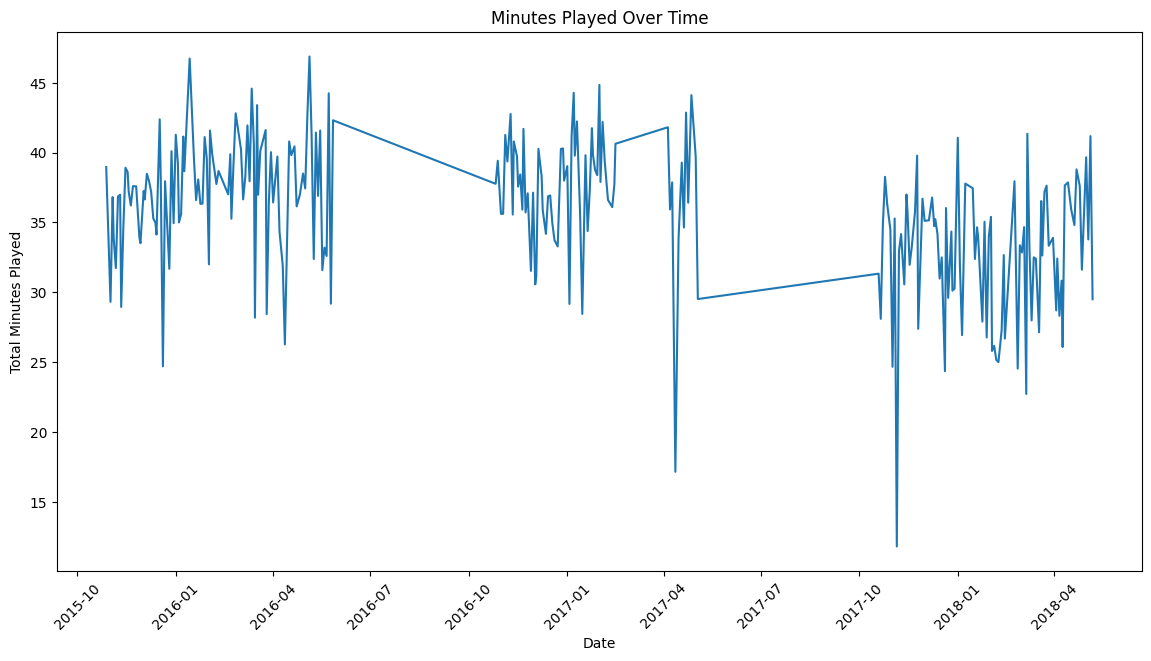

In [33]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_min', data = kyle_lowry_df)
plt.title('Minutes Played Over Time')
plt.xlabel('Date')
plt.ylabel('Total Minutes Played')
plt.xticks(rotation=45)  
plt.show()

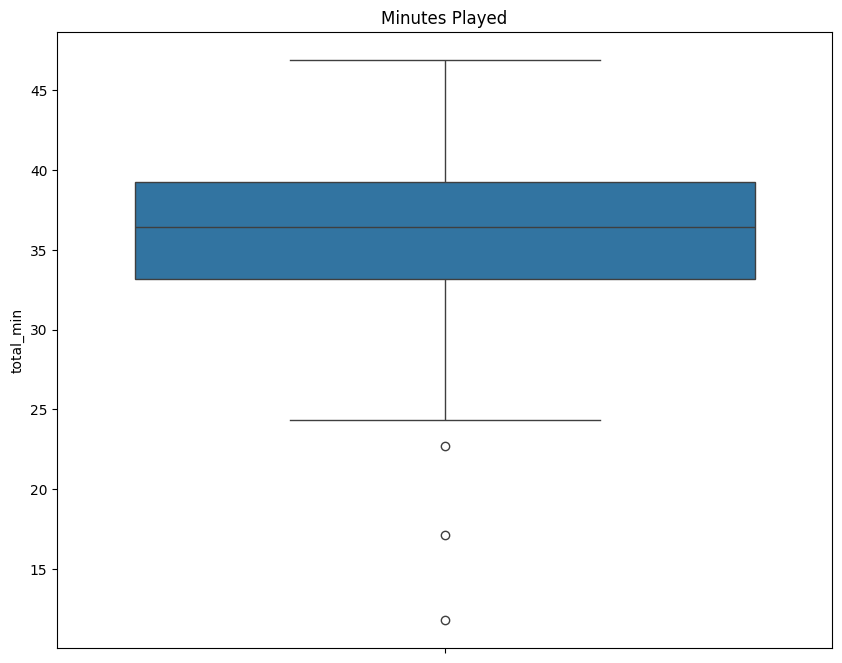

In [34]:
# Boxplot of minutes played
plt.figure(figsize=(10, 8))
sns.boxplot(y=kyle_lowry_df['total_min'])
plt.title('Minutes Played')
plt.show()


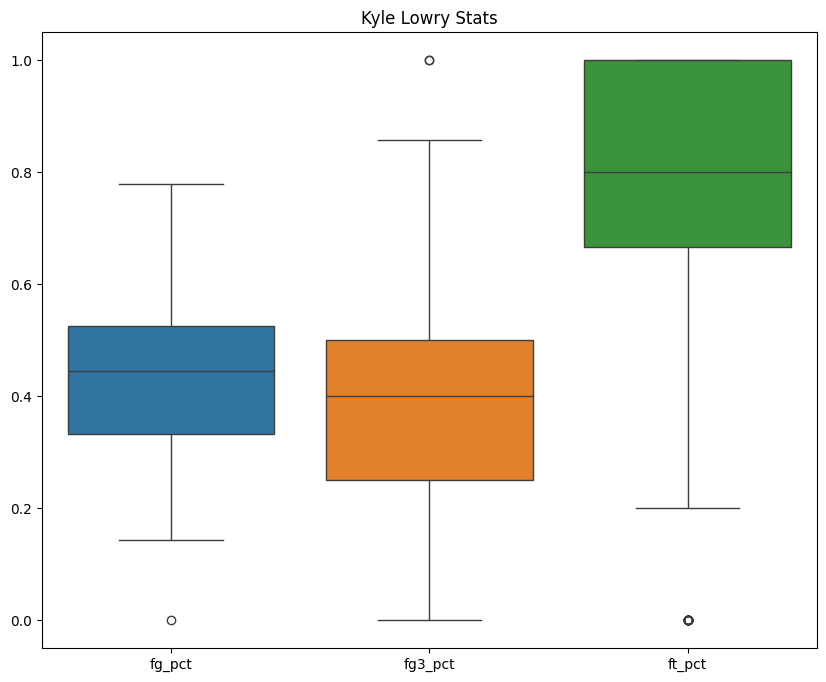

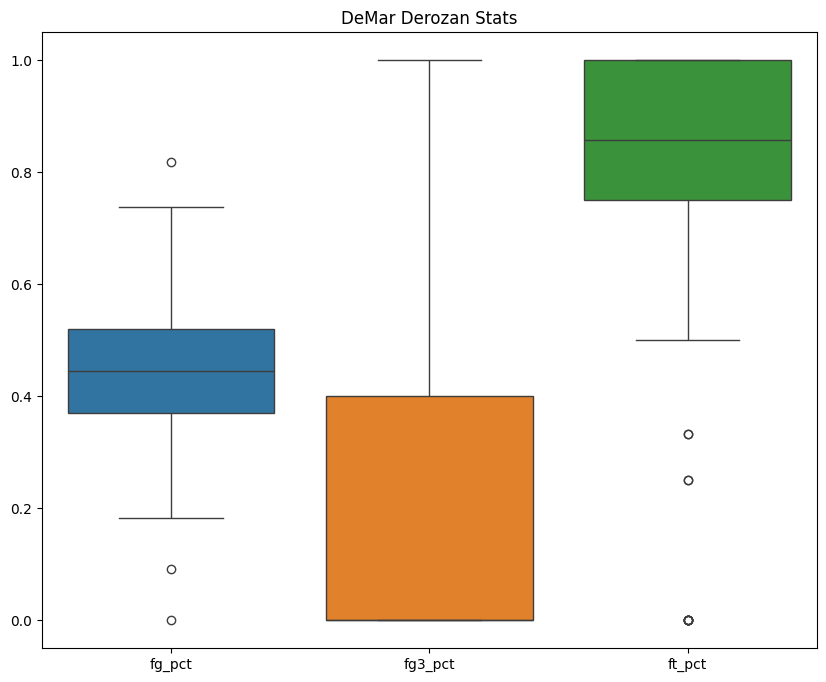

In [39]:
# Boxplot of percentages for both players
plt.figure(figsize=(10, 8))
sns.boxplot(data=kyle_lowry_df[['fg_pct', 'fg3_pct', 'ft_pct']])
plt.title('Kyle Lowry Stats')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=demar_derozan_df[['fg_pct', 'fg3_pct', 'ft_pct']])
plt.title('DeMar Derozan Stats')
plt.show()

In [36]:
kyle_lowry_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,fta,ftm,min,oreb,pf,pts,reb,stl,turnover,total_min
1,27820,2015-10-28,6.0,0.0,2.0,0.500,4.0,2.0,0.471,17.0,...,6.0,5.0,38:58,1.0,4.0,23.0,3.0,2.0,5.0,38.966667
2,27689,2015-10-30,9.0,2.0,6.0,0.000,1.0,0.0,0.273,11.0,...,10.0,8.0,34:14,1.0,4.0,14.0,7.0,3.0,3.0,34.233333
3,28885,2015-11-01,7.0,0.0,3.0,0.200,5.0,1.0,0.500,10.0,...,4.0,4.0,29:19,2.0,3.0,15.0,5.0,4.0,1.0,29.316667
4,29251,2015-11-03,10.0,2.0,5.0,0.800,5.0,4.0,0.600,15.0,...,5.0,5.0,36:49,0.0,4.0,27.0,5.0,3.0,4.0,36.816667
5,31100,2015-11-04,1.0,0.0,4.0,0.375,8.0,3.0,0.357,14.0,...,6.0,4.0,33:51,0.0,4.0,17.0,4.0,2.0,5.0,33.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,34808,2018-04-27,6.0,0.0,5.0,0.429,7.0,3.0,0.600,15.0,...,4.0,3.0,31:37,1.0,2.0,24.0,6.0,1.0,2.0,31.616667
255,35639,2018-05-01,10.0,0.0,3.0,0.500,6.0,3.0,0.500,12.0,...,3.0,3.0,39:40,0.0,2.0,18.0,3.0,1.0,4.0,39.666667
256,33043,2018-05-03,8.0,0.0,4.0,0.500,6.0,3.0,0.700,10.0,...,5.0,4.0,33:47,0.0,5.0,21.0,4.0,0.0,4.0,33.783333
257,33047,2018-05-05,7.0,0.0,3.0,0.500,8.0,4.0,0.692,13.0,...,6.0,5.0,41:11,0.0,2.0,27.0,3.0,2.0,5.0,41.183333


In [37]:
demar_derozan_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,fta,ftm,min,oreb,pf,pts,reb,stl,turnover,total_min
1,27820,2015-10-28,6.0,0.0,5.0,0.50,2.0,1.0,0.412,17.0,...,16.0,10.0,35:52,0.0,2.0,25.0,5.0,2.0,2.0,35.866667
2,27689,2015-10-30,6.0,0.0,6.0,0.25,4.0,1.0,0.333,15.0,...,14.0,12.0,34:45,1.0,4.0,23.0,7.0,2.0,3.0,34.750000
3,28885,2015-11-01,4.0,1.0,1.0,0.00,1.0,0.0,0.538,13.0,...,2.0,1.0,37:17,0.0,1.0,15.0,1.0,1.0,2.0,37.283333
4,29251,2015-11-03,2.0,0.0,3.0,0.00,0.0,0.0,0.462,13.0,...,8.0,8.0,28:23,1.0,3.0,20.0,4.0,1.0,3.0,28.383333
5,31100,2015-11-04,3.0,0.0,4.0,0.00,0.0,0.0,0.389,18.0,...,15.0,14.0,38:35,1.0,1.0,28.0,5.0,2.0,2.0,38.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,34808,2018-04-27,4.0,0.0,2.0,0.00,4.0,0.0,0.333,18.0,...,4.0,4.0,33:27,0.0,2.0,16.0,2.0,0.0,0.0,33.450000
273,35639,2018-05-01,5.0,3.0,6.0,0.00,4.0,0.0,0.500,20.0,...,3.0,2.0,40:17,1.0,3.0,22.0,7.0,1.0,2.0,40.283333
274,33043,2018-05-03,3.0,0.0,0.0,0.00,5.0,0.0,0.478,23.0,...,2.0,2.0,35:06,0.0,5.0,24.0,0.0,0.0,1.0,35.100000
275,33047,2018-05-05,2.0,2.0,3.0,0.00,0.0,0.0,0.250,12.0,...,2.0,2.0,27:48,1.0,3.0,8.0,4.0,2.0,3.0,27.800000


In [35]:
# Convert to a csv file
kyle_lowry_df.to_csv('kyle_lowry.csv', index=False)
demar_derozan_df.to_csv('demar_derozan.csv', index=False)